Rendements log calculés : 1   -0.007164
2    0.001003
3    0.004601
4   -0.002533
5   -0.002124
Name: Price, dtype: float64


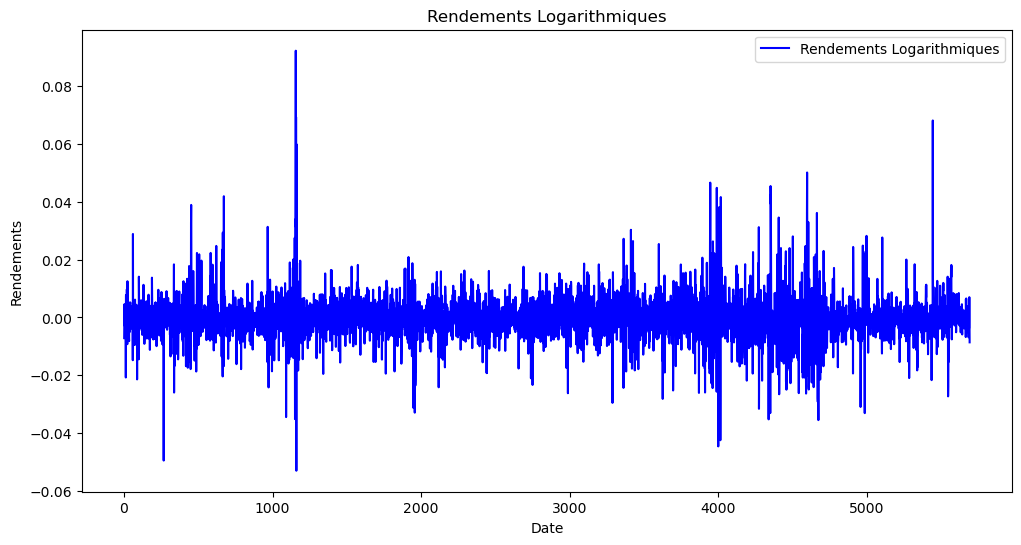

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5551.76
Distribution:                  Normal   AIC:                           11111.5
Method:            Maximum Likelihood   BIC:                           11138.1
                                        No. Observations:                 5692
Date:                Sun, Nov 03 2024   Df Residuals:                     5691
Time:                        15:05:59   Df Model:                            1
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
mu            -0.0313  8.749e-03     -3.576  3.494e-

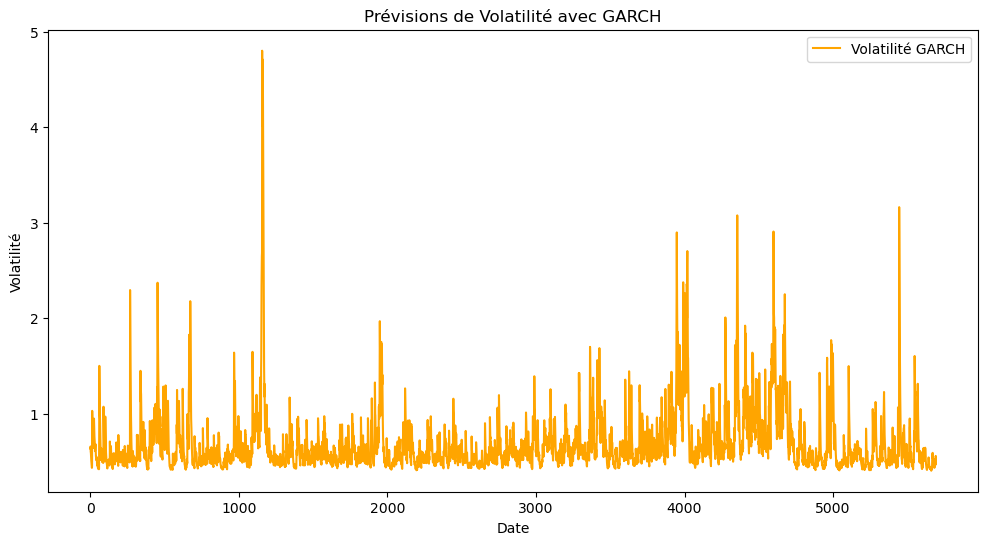

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Charger les données de prix
data = pd.read_excel(r"C:\Users\windows\Downloads\Masi.xlsx") 
prices = data['Price']  

returns = np.log(prices / prices.shift(1)).dropna()  # Calcul du rendement log

print("Rendements log calculés :", returns.head())

plt.figure(figsize=(12, 6))
plt.plot(returns, label='Rendements Logarithmiques', color='blue')
plt.title("Rendements Logarithmiques")
plt.xlabel("Date")
plt.ylabel("Rendements")
plt.legend()
plt.show()

returns_scaled = returns * 100  # Mise à l'échelle des rendements

model_garch = arch_model(returns_scaled, vol='Garch', p=1, q=1)
garch_fit = model_garch.fit(disp='off')
print(garch_fit.summary())

volatility_forecast = garch_fit.conditional_volatility

plt.figure(figsize=(12, 6))
plt.plot(volatility_forecast, label='Volatilité GARCH', color='orange')
plt.title('Prévisions de Volatilité avec GARCH')
plt.xlabel('Date')
plt.ylabel('Volatilité')
plt.legend()
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns.values.reshape(-1, 1))

def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(returns_scaled, seq_length)
print("Exemple de séquence d'entrée :", X[0])
print("Valeur cible correspondante :", y[0])


Exemple de séquence d'entrée : [[-0.91648161]
 [ 0.1645588 ]
 [ 0.64086684]
 [-0.30357891]
 [-0.24934891]
 [-0.37169656]
 [-0.15570426]
 [-0.27883551]
 [-0.0165423 ]
 [ 0.03590733]
 [ 0.45113689]
 [-2.71902353]
 [ 1.03241913]
 [ 1.06222873]
 [ 0.52973992]
 [ 0.04228373]
 [ 0.46526135]
 [-1.18401171]
 [ 1.3212536 ]
 [ 0.1267349 ]
 [-0.08095973]
 [-1.19321691]
 [ 1.68995685]
 [ 1.62045501]
 [ 0.73178846]
 [-0.68850961]
 [-0.78065072]
 [-0.79946985]
 [ 0.74099081]
 [-0.17887752]]
Valeur cible correspondante : [-0.55048317]


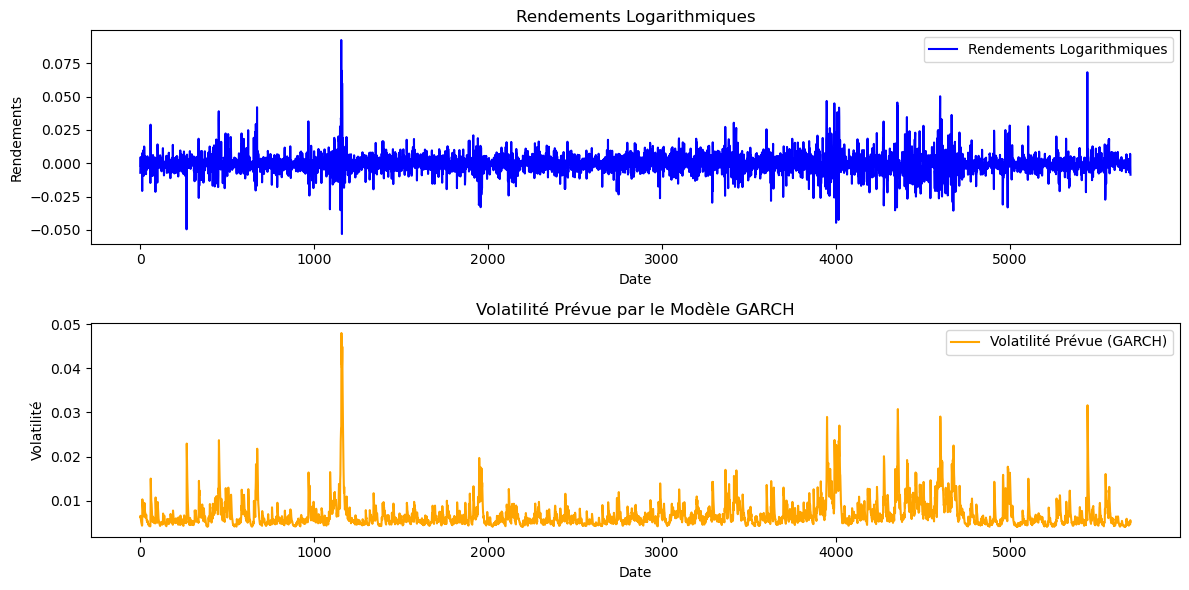

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

data = pd.read_excel(r"C:\Users\windows\Downloads\Masi.xlsx") 
prices = data['Price']  

returns = np.log(prices / prices.shift(1)).dropna()

returns_scaled = returns * 100  # Multiplier par 100 pour le rescaling

model_garch = arch_model(returns_scaled, vol='Garch', p=1, q=1)
garch_fit = model_garch.fit(disp='off')

volatility_forecast = garch_fit.conditional_volatility / 100  # Revenir à l'échelle originale

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(returns, label='Rendements Logarithmiques', color='blue')
plt.title('Rendements Logarithmiques')
plt.xlabel('Date')
plt.ylabel('Rendements')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(volatility_forecast, label='Volatilité Prévue (GARCH)', color='orange')
plt.title('Volatilité Prévue par le Modèle GARCH')
plt.xlabel('Date')
plt.ylabel('Volatilité')
plt.legend()

plt.tight_layout()
plt.show()


Modèle LSTM créé avec succès
Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 1.0170 - val_loss: 1.0247
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.9274 - val_loss: 1.0350
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.9930 - val_loss: 1.0311
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.9008 - val_loss: 0.9980
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.9715 - val_loss: 1.0101
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.9334 - val_loss: 0.9817
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.9038 - val_loss: 0.9481
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.9338 - val_loss: 0.9506
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.9553 - val_loss: 0.9499
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.9084 - val_loss: 0.9694
Epoch 11/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.8357 - val_loss: 0.9449
Epoch 12/100
71/71 ━━━

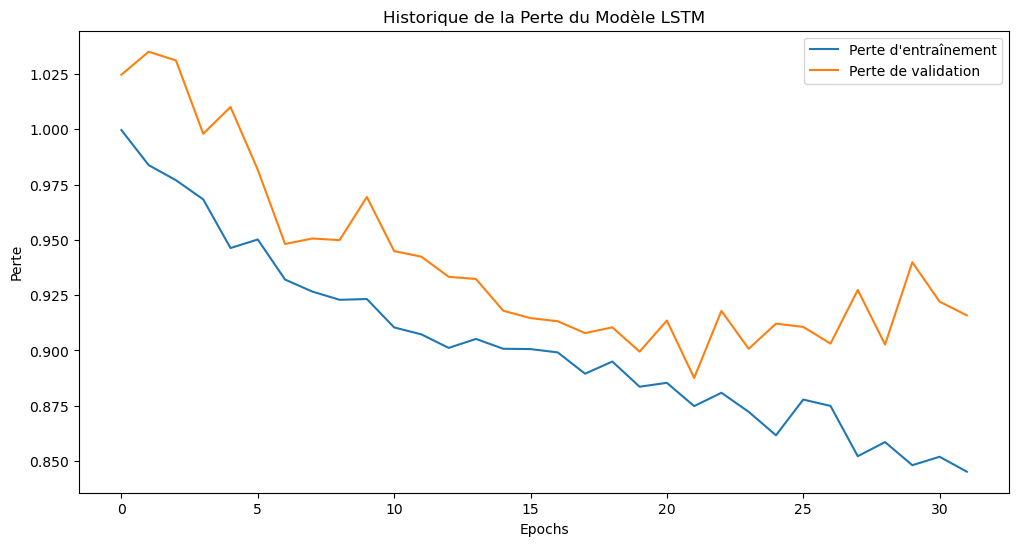

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from arch import arch_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

data = pd.read_excel(r"C:\Users\windows\Downloads\Masi.xlsx") 
prices = data['Price']  

returns = np.log(prices / prices.shift(1)).dropna()

scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns.values.reshape(-1, 1))

model_garch = arch_model(returns_scaled.flatten(), vol='Garch', p=1, q=1)
garch_fit = model_garch.fit(disp='off')

volatility_forecast = garch_fit.conditional_volatility

def create_sequences_with_volatility(data, volatility, seq_length=30):
    X, y = [], []
    for i in range(seq_length, len(data)):
        vol_slice = volatility[i-seq_length:i].reshape(-1, 1)  # Reshape de la volatilité
        X.append(np.hstack((data[i-seq_length:i], vol_slice)))  # Inclure la volatilité
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences_with_volatility(returns_scaled, volatility_forecast, seq_length)

X_train = X.reshape(X.shape[0], X.shape[1], 2)  # 2 caractéristiques ici

train_size = int(len(X_train) * 0.8)  # 80% pour l'entraînement
X_train_split, X_test_split = X_train[:train_size], X_train[train_size:]
y_train_split, y_test_split = y[:train_size], y[train_size:]

model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # 2 caractéristiques ici
    LSTM(50, return_sequences=True),
    Dropout(0.2),  # Ajouter Dropout
    LSTM(50),
    Dropout(0.2),  # Ajouter Dropout
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
print("Modèle LSTM créé avec succès")

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_split, y_train_split, 
                    epochs=100,            # Nombre d'époques à entraîner
                    batch_size=64,         # Augmenter la taille du lot
                    validation_data=(X_test_split, y_test_split),  # Validation avec l'ensemble de test
                    callbacks=[early_stopping],  # Ajouter EarlyStopping
                    verbose=1)            # Affichage des progrès

train_loss = model.evaluate(X_train_split, y_train_split)
test_loss = model.evaluate(X_test_split, y_test_split)
print(f"Perte d'entraînement : {train_loss}, Perte de test : {test_loss}")

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Historique de la Perte du Modèle LSTM')
plt.xlabel('Epochs')
plt.ylabel('Perte')
plt.legend()
plt.show()


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


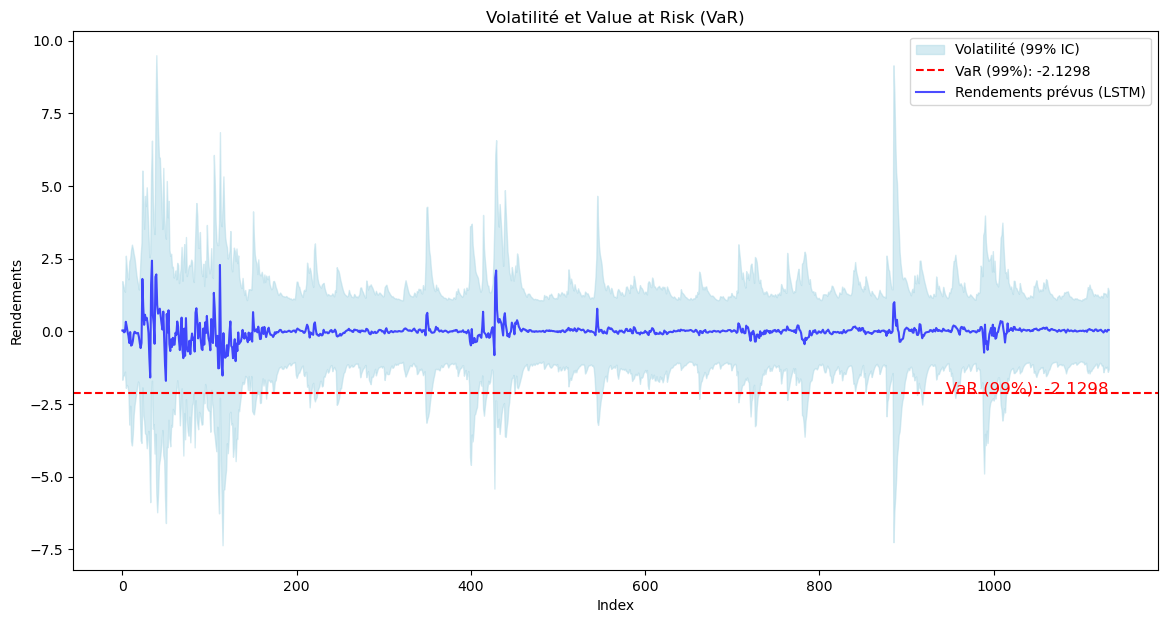

In [13]:
import numpy as np
import matplotlib.pyplot as plt

predicted_returns = model.predict(X_test_split).flatten()

predicted_volatility = volatility_forecast[train_size + seq_length:]

# Calculer la VaR à 99%
confidence_level = 0.99
simulated_returns = np.random.normal(loc=predicted_returns, scale=predicted_volatility, size=(10000, len(predicted_returns)))
VaR = -np.percentile(simulated_returns, (1 - confidence_level) * 100, axis=0)

upper_bound = predicted_returns + 1.96 * predicted_volatility  # IC 99% supérieur
lower_bound = predicted_returns - 1.96 * predicted_volatility  # IC 99% inférieur

plt.figure(figsize=(14, 7))

plt.fill_between(range(len(predicted_returns)), lower_bound, upper_bound, color='lightblue', alpha=0.5, label='Volatilité (99% IC)')

plt.axhline(y=-VaR.mean(), color='red', linestyle='--', label=f'VaR (99%): {-VaR.mean():.4f}')

plt.plot(predicted_returns, color='blue', label='Rendements prévus (LSTM)', alpha=0.7)

plt.text(len(predicted_returns) - 1, -VaR.mean(), f'VaR (99%): {-VaR.mean():.4f}', color='red', fontsize=12, ha='right')

plt.title('Volatilité et Value at Risk (VaR)')
plt.xlabel('Index')
plt.ylabel('Rendements')
plt.legend()
plt.show()
